# Introduction
In this course, we will cover computer vision techniques, including convolutional neural networks. By the end of Day 3, students should have a working model of an image classifier.



# Part 1: What is computer vision?
From an engineering point-of-view, computer vision is a field that tries to model and understand the mechanism behind the human visual system, so that we can apply similar methods or algorithms to automate certain tasks. For example, the task of identifying a person's face in an image, or the task of identifying an object in an image.

### Task 1
Load in an example image of your choice to practice some image processing methods. If you do not have an image on hand, you are welcome to download an image from here (http://users.bmap.ucla.edu/~yeunkim/examples/gum.jpg): 

In [ ]:
# load in image
from google.colab import files
uploaded = files.upload()

# or !wget http://users.bmap.ucla.edu/~yeunkim/examples/gum.jpg

In [ ]:
# import opencv, numpy, and matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image

*Note*: OpenCV reads in images as BGR, not RGB. If you would like to change the channels, run: img = img[..., [2,1,0]] 

In [ ]:
# load in image and plot
filename = './Bear.png' # modify this line and put the name of the image file
img = cv2.imread(filename)
plt.imshow(img)
print(img.shape)


# Image processing methods
Now, we will go over some common image processing methods. I like to think of these methods as a pre-processing step to computer vision methods, analogous to cutting and seasoning a piece of meat before it gets cooked. But image processing are not always required prior to computer vision methods.

## Image Smoothing
### Averaging 
This uses a kernel (we will go into kernel in more depth in the later sections; but for now, think of them a NxN matrix) with the same equal coefficients to smooth/blur images.

### Gaussian filtering
We'll go more into detail in the later sections.

This is a Gaussian filter that smooths/blurs images.



In [ ]:
## Averaging 
# set kernel width and height
x_width = 10
y_width =10

# blur image
avg_blur = cv2.blur(img,
                    (x_width,y_width))

# plot
plt.imshow(avg_blur)
plt.show()


In [ ]:
## Gaussian filtering 

# set kernel width and height (must be odd numbers)
x_width = 11
y_width =11
standard_dev = 2

# blur image
Gauss_blur = cv2.GaussianBlur(img,
                              (x_width,y_width),
                              standard_dev)

# plot
plt.imshow(avg_blur)
plt.show()


## Image Thresholding
### Simple thresholding
If a pixel value is greater than a threshold value, it is assigned one value, else it is assigned another value.

Types:
* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

In [ ]:
img = cv2.imread(filename,0) # load in image as greyscale
threshold_value = 150
otherwise_assign = 255

_,thresh = cv2.threshold(img,
                         threshold_value,
                         otherwise_assign,
                         cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

## Canny Edge Detection

Detects edges in an image (sharply different contrasts in intensity value). Method steps: (1) filter out noise, (2) find intensity gradient, (3) if the contrast gradient is greater than a certain value, then it's considered an edge, (4) removes voxels if not considered an edge, and (5) thresholds using a lower and upper threshold.

In [ ]:
lower_thresh = 100
upper_thresh = 200
apertureSize_of_sobel_operator = 3
edges = cv2.Canny(img,lower_thresh,
                  upper_thresh, 
                  apertureSize = apertureSize_of_sobel_operator)

plt.imshow(edges, cmap='gray')
plt.show()

## Morphological Transformations

Some simple methods to morph the shape of the foreground object in an image (usually binary).

* Erosion: Erodes the foreground (white or 1) object if the object does not cover the entire area of the structuring element. E.g. if a structuring element is a 2x1 pixel rectangle, then any cluster of white pixels that are smaller than 2x1 will be eroded/changed to 0.
* Dilation: Opposite of erosion. If there is at least one white pixel under the structuring element, then it will dilate/increase.

We often combine these two operations to open or close segmentations/objects in an image.

* Opening: erosion then dilation (removes noise).
* Closing: dilation then erosion (removes holes).

In [ ]:
import numpy as np

structuring_element = np.ones((30,30))  
print(structuring_element)


In [ ]:
dilation = cv2.dilate(edges, 
                      structuring_element, 
                      iterations=1)

structuring_element2 = np.ones((20,20))
erosion = cv2.erode(dilation, 
                    structuring_element2, 
                    iterations=1) 

plt.subplot(121)
plt.imshow(dilation, cmap='gray')
plt.title('dilation first')
plt.subplot(122)
plt.imshow(erosion, cmap='gray')
plt.title('erosion second')
plt.show()

## Image Filtering

Now, we'll go back to smoothing in more detail. The way that a smoothing works is by running a kernel across the image and multiplying each element in the kernel with the pixel that it is on top of. Then all the products in the kernel and underneath pixels are added up.

The following example has a filter/kernel with the pattern "X". 
Notice how when the pattern of the kernel overlaps well with the pattern in the underlying image, it gives a greater value (4). Hence, we can design kernels and filters in a way that can detect certain patterns or features in an image.

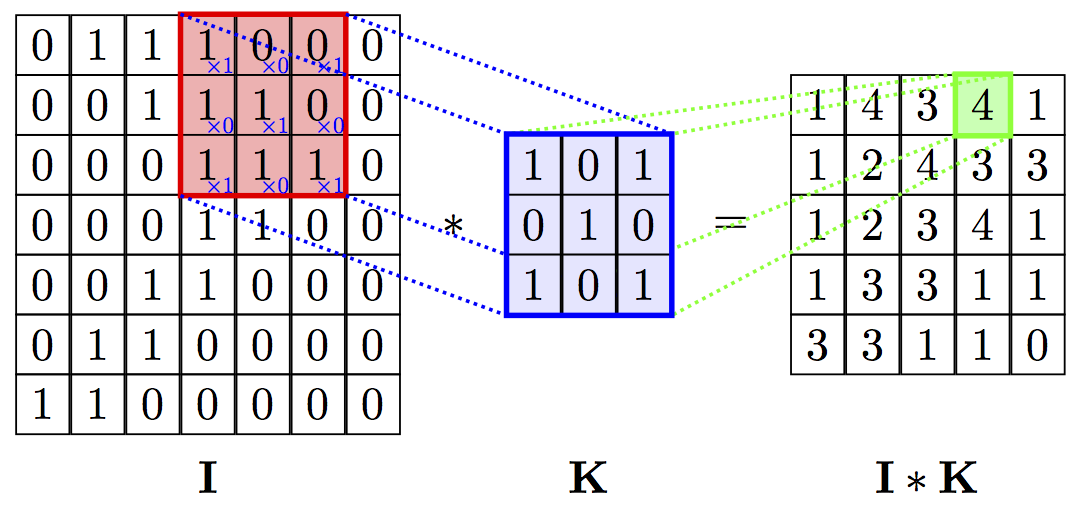

Graphics from https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524

The following is a Gaussian kernel that we used for Gaussian smoothing. An average kernel would have all the same coefficients in the kernel.

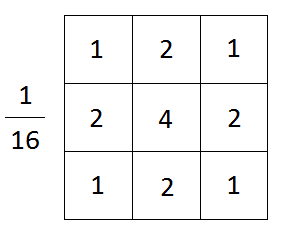

From https://www.opencv-srf.com/2018/03/gaussian-blur.html

A kernel can be comprised of any number. Here is another example:

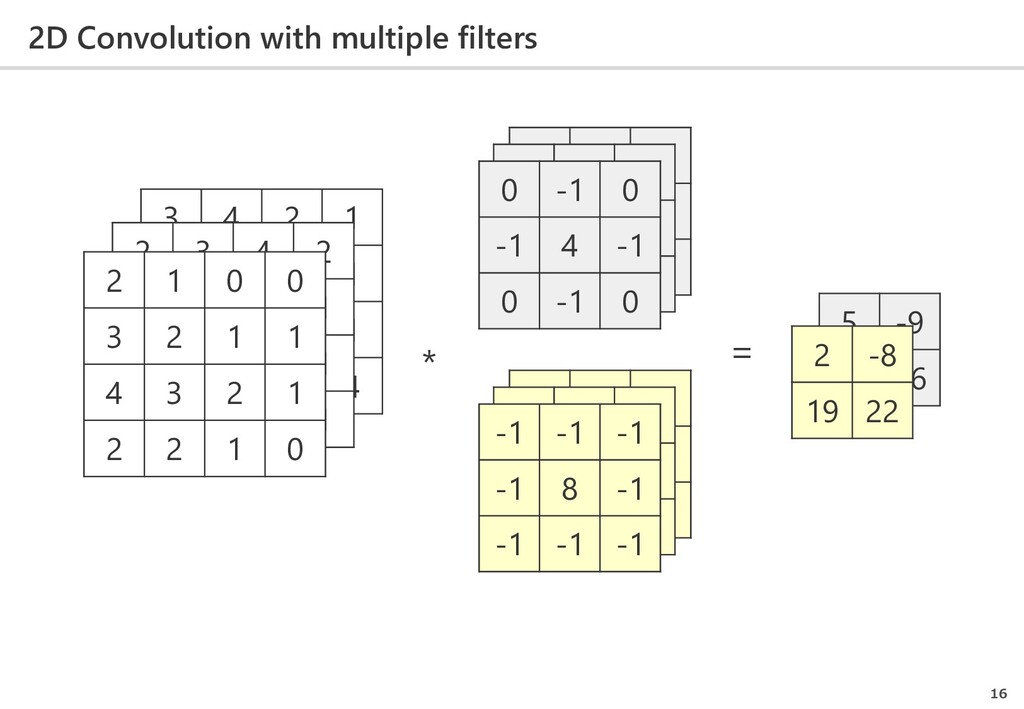

Image from https://speakerdeck.com/chokkan/convolutional-neural-network

This method is also called 2D convolution. This concept is important for the later modules (hint: Convolutional Neural Network).

## Task 2
Download the image from http://users.bmap.ucla.edu/~yeunkim/examples/stoplight.jpg using wget. Using any (or a combination of) the methods above, try to segment out only the top and bottom light in this photo. FYI, OpenCV uses BGR not RGB. 

In [ ]:
!wget http://users.bmap.ucla.edu/~yeunkim/examples/stoplight.jpg

In [ ]:
##  Write your code here.

# Part 2: What are neural networks?

Neural networks are a series of equations that interact with one another to form a large, more complex equation that is able to model relationships. As a subset of a learning algorithm, it has tunable parameters that can be optimized. 

The following slides were created by **Dr. Jonathan Kao from UCLA for class EE 239AS**.

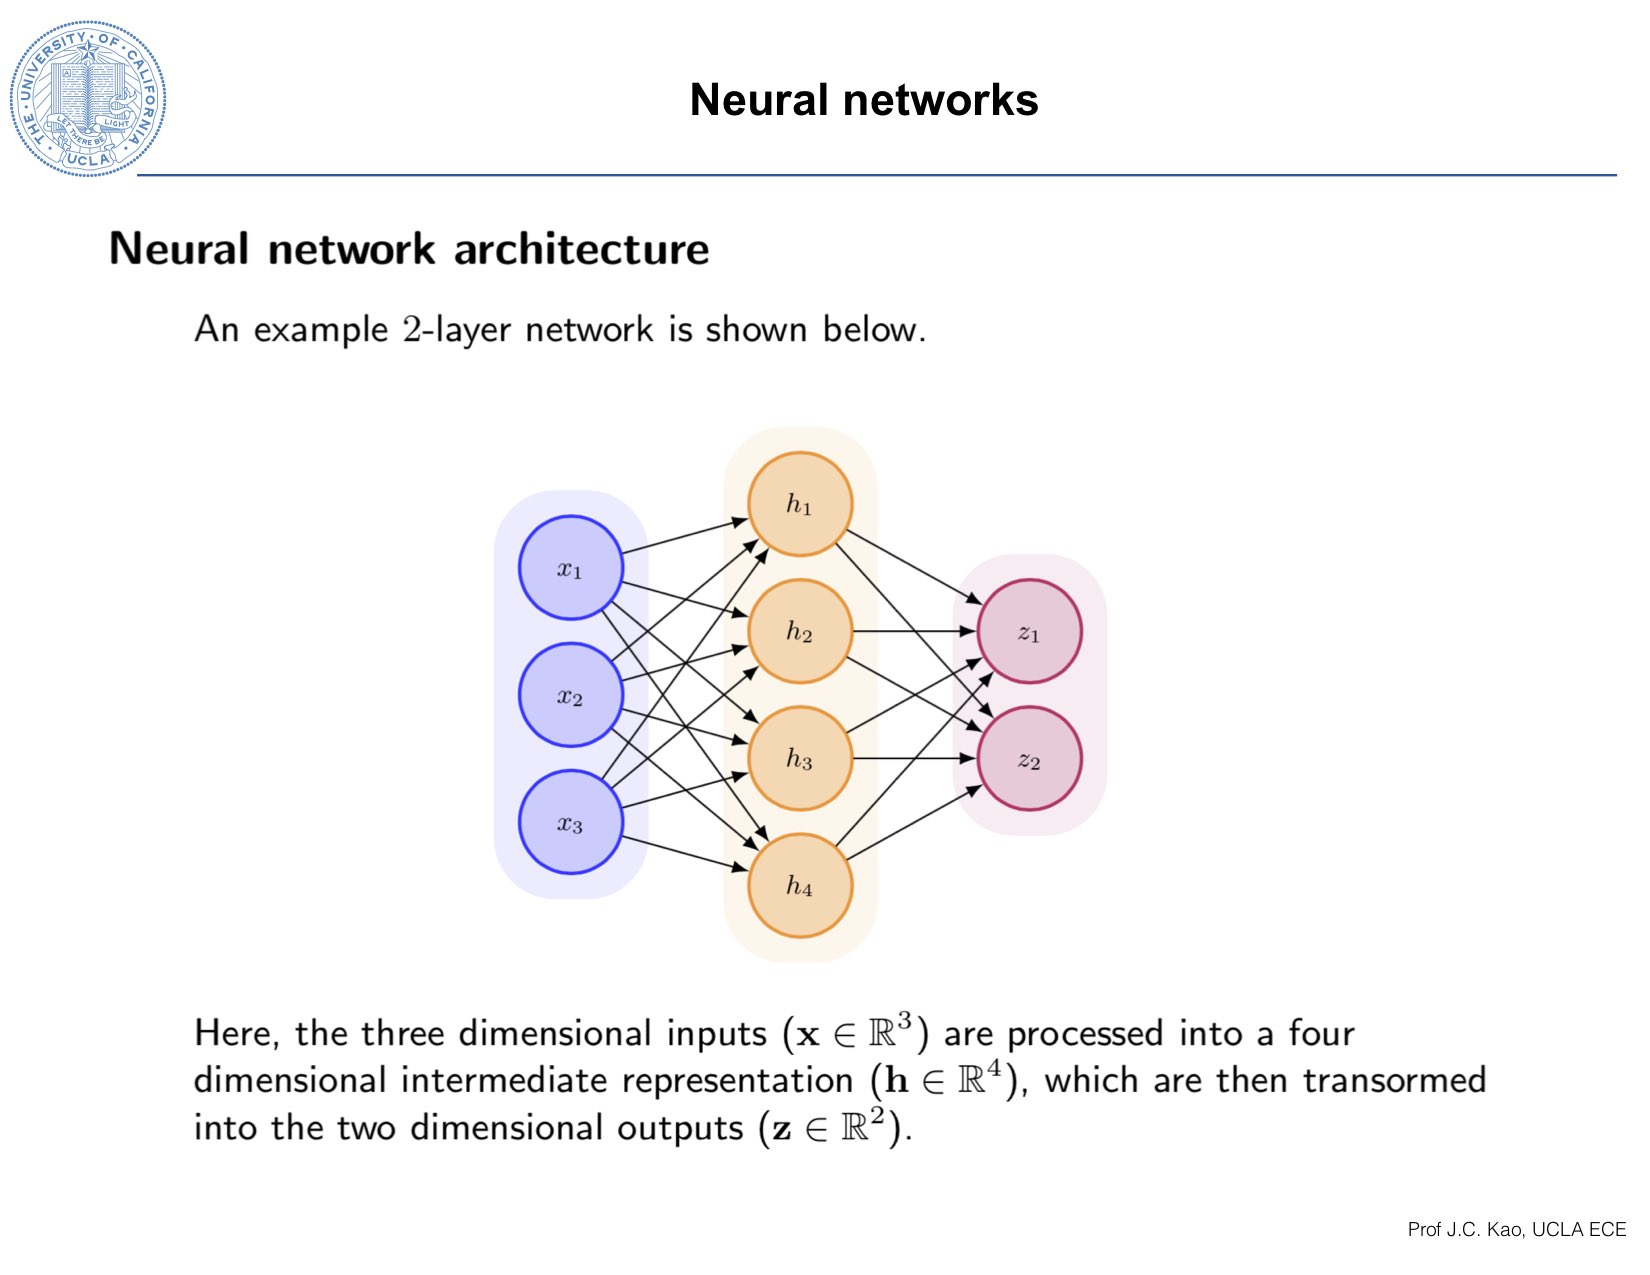

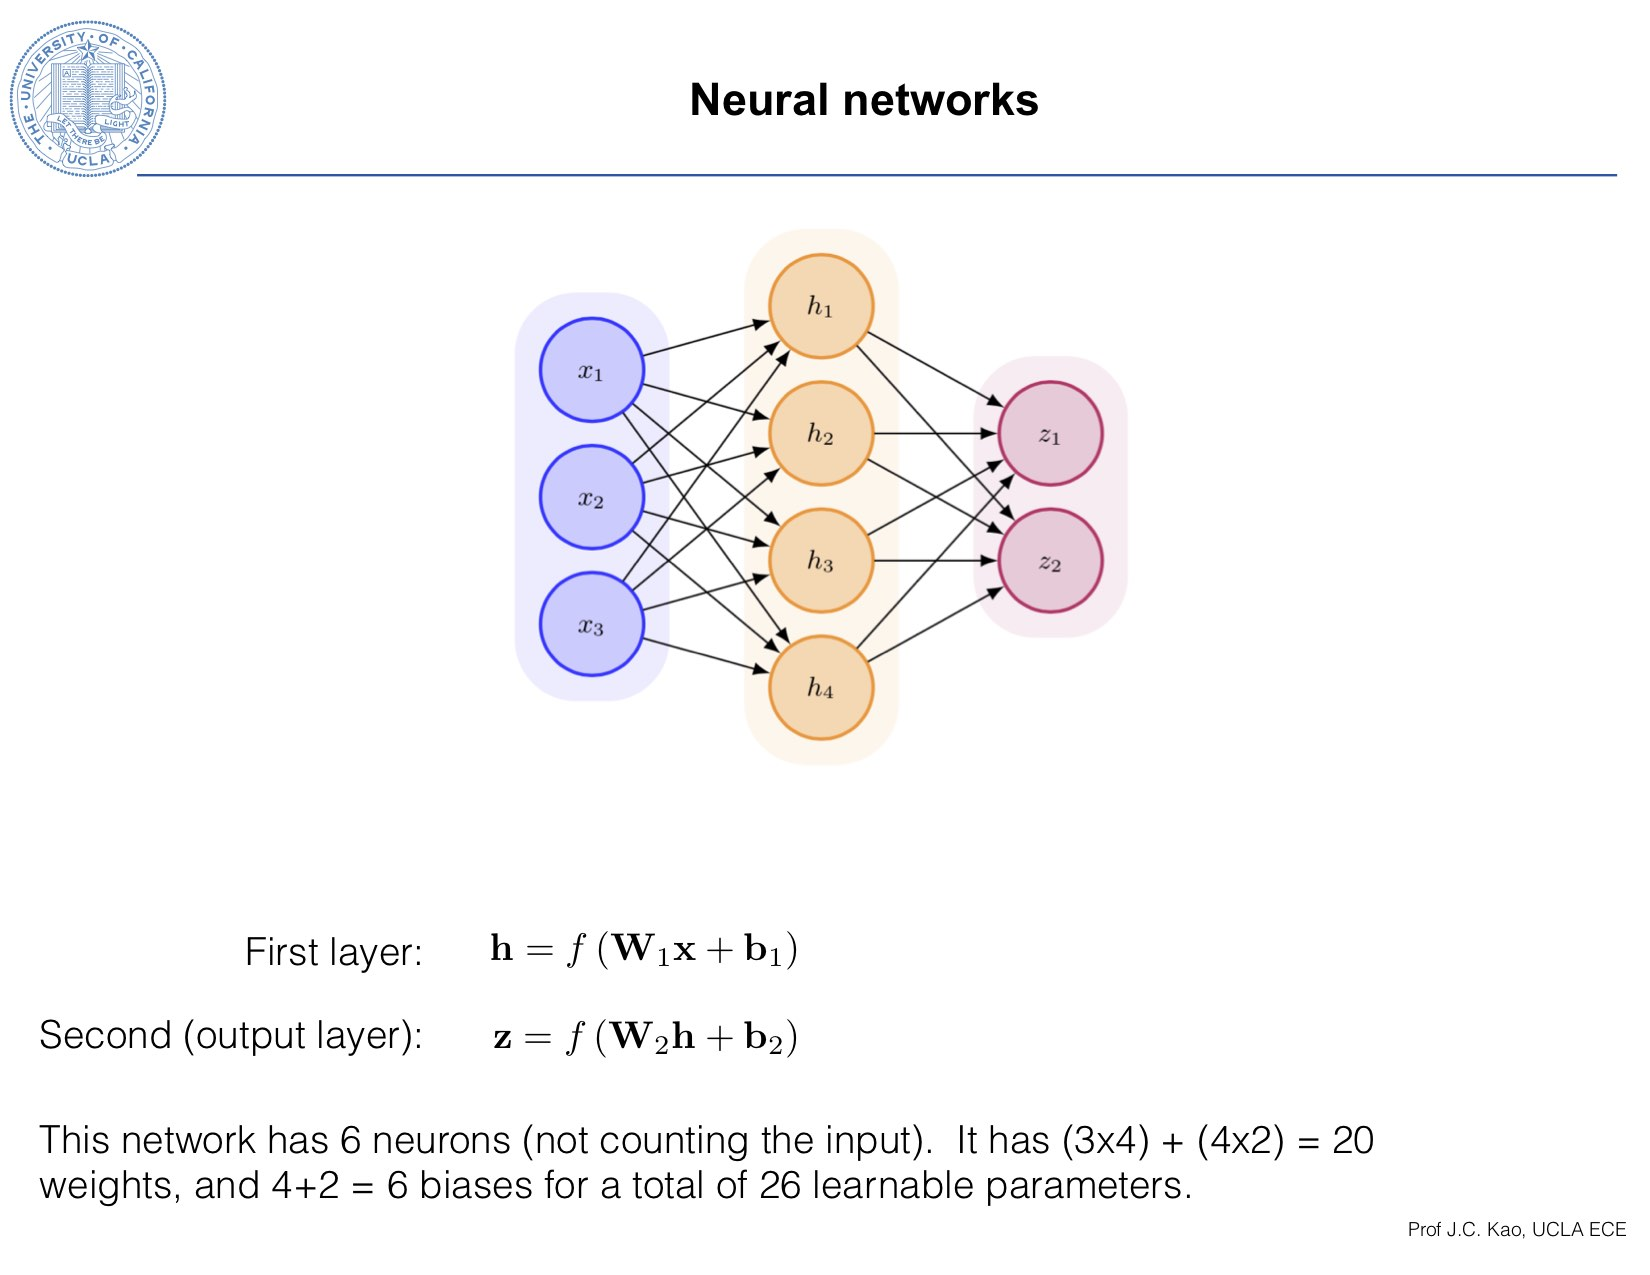

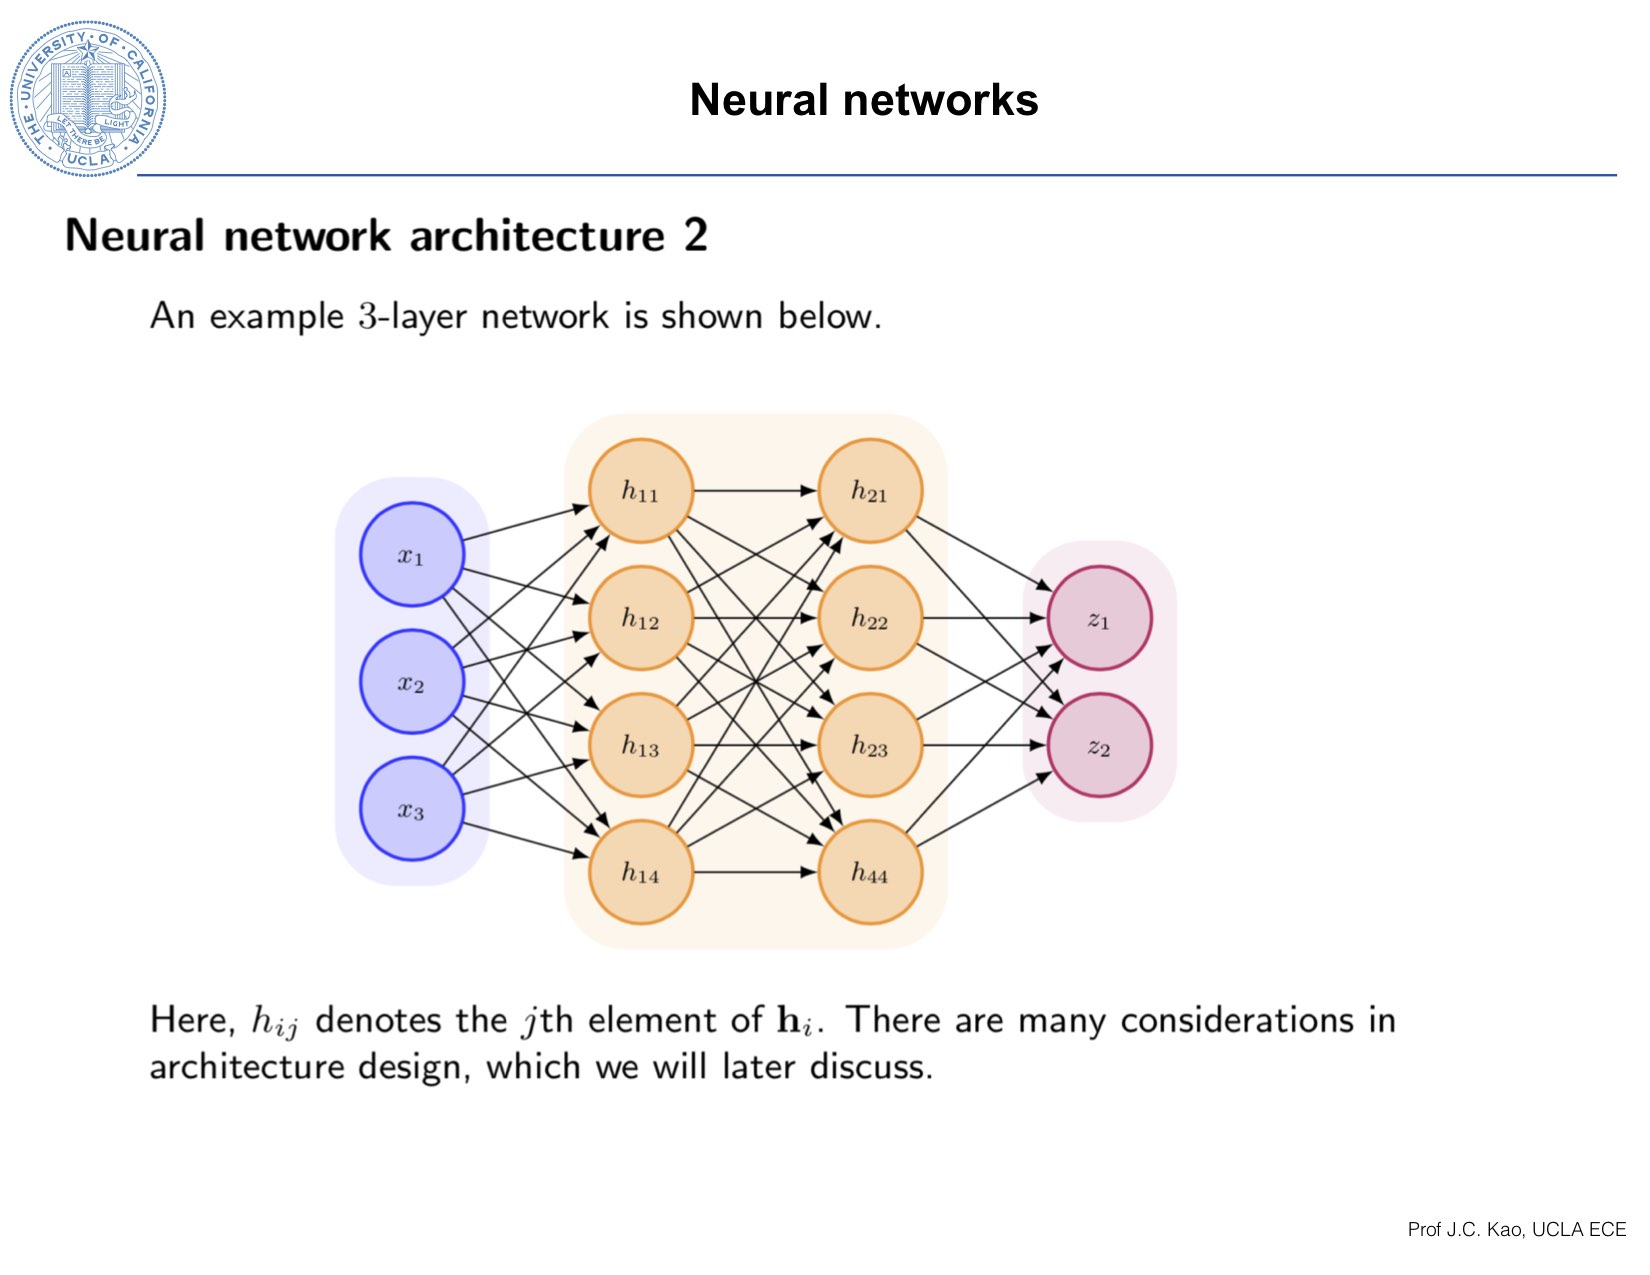

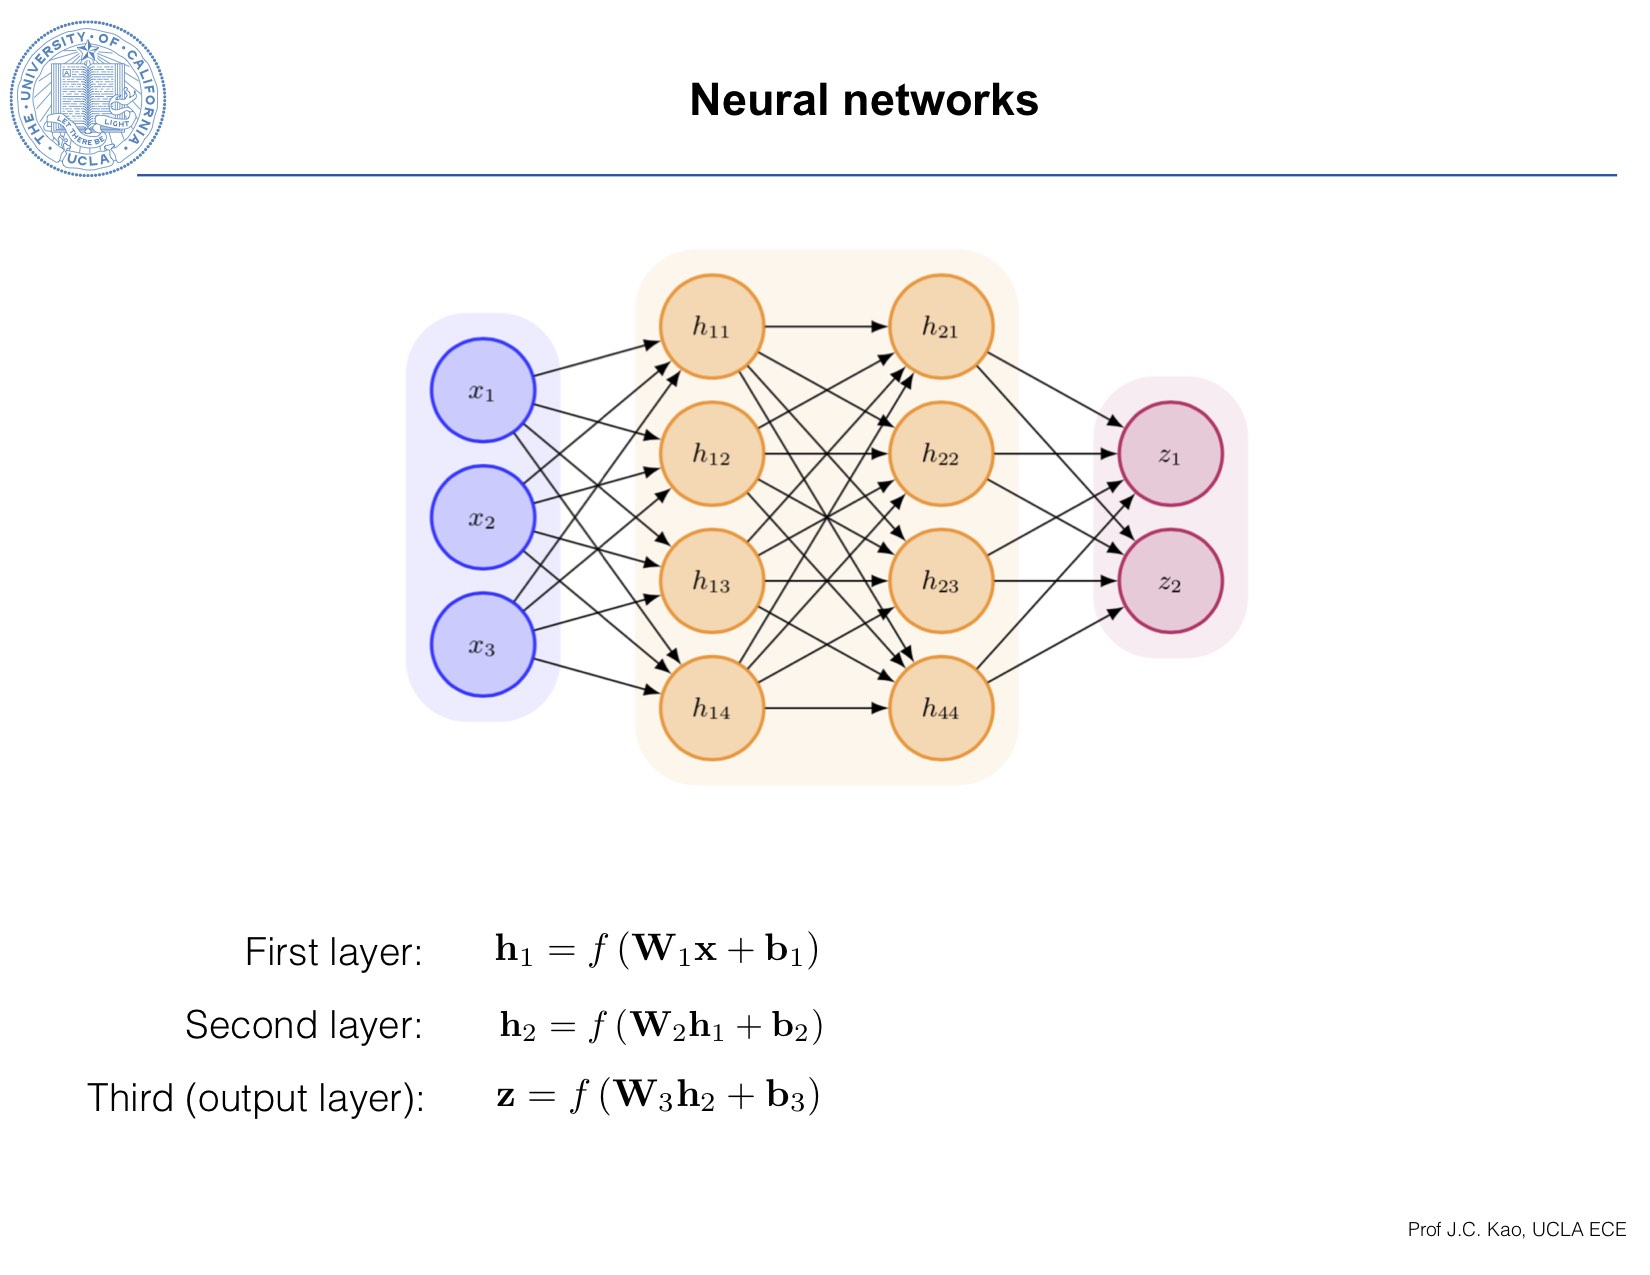

## Non-linearity in hidden layers (activation functions)
To increase complexity and capacity of the network, we can inject non-linearity by making the f() function a non-linear function. The most common function is called the ReLU function (Recified linear unit, ReLU).

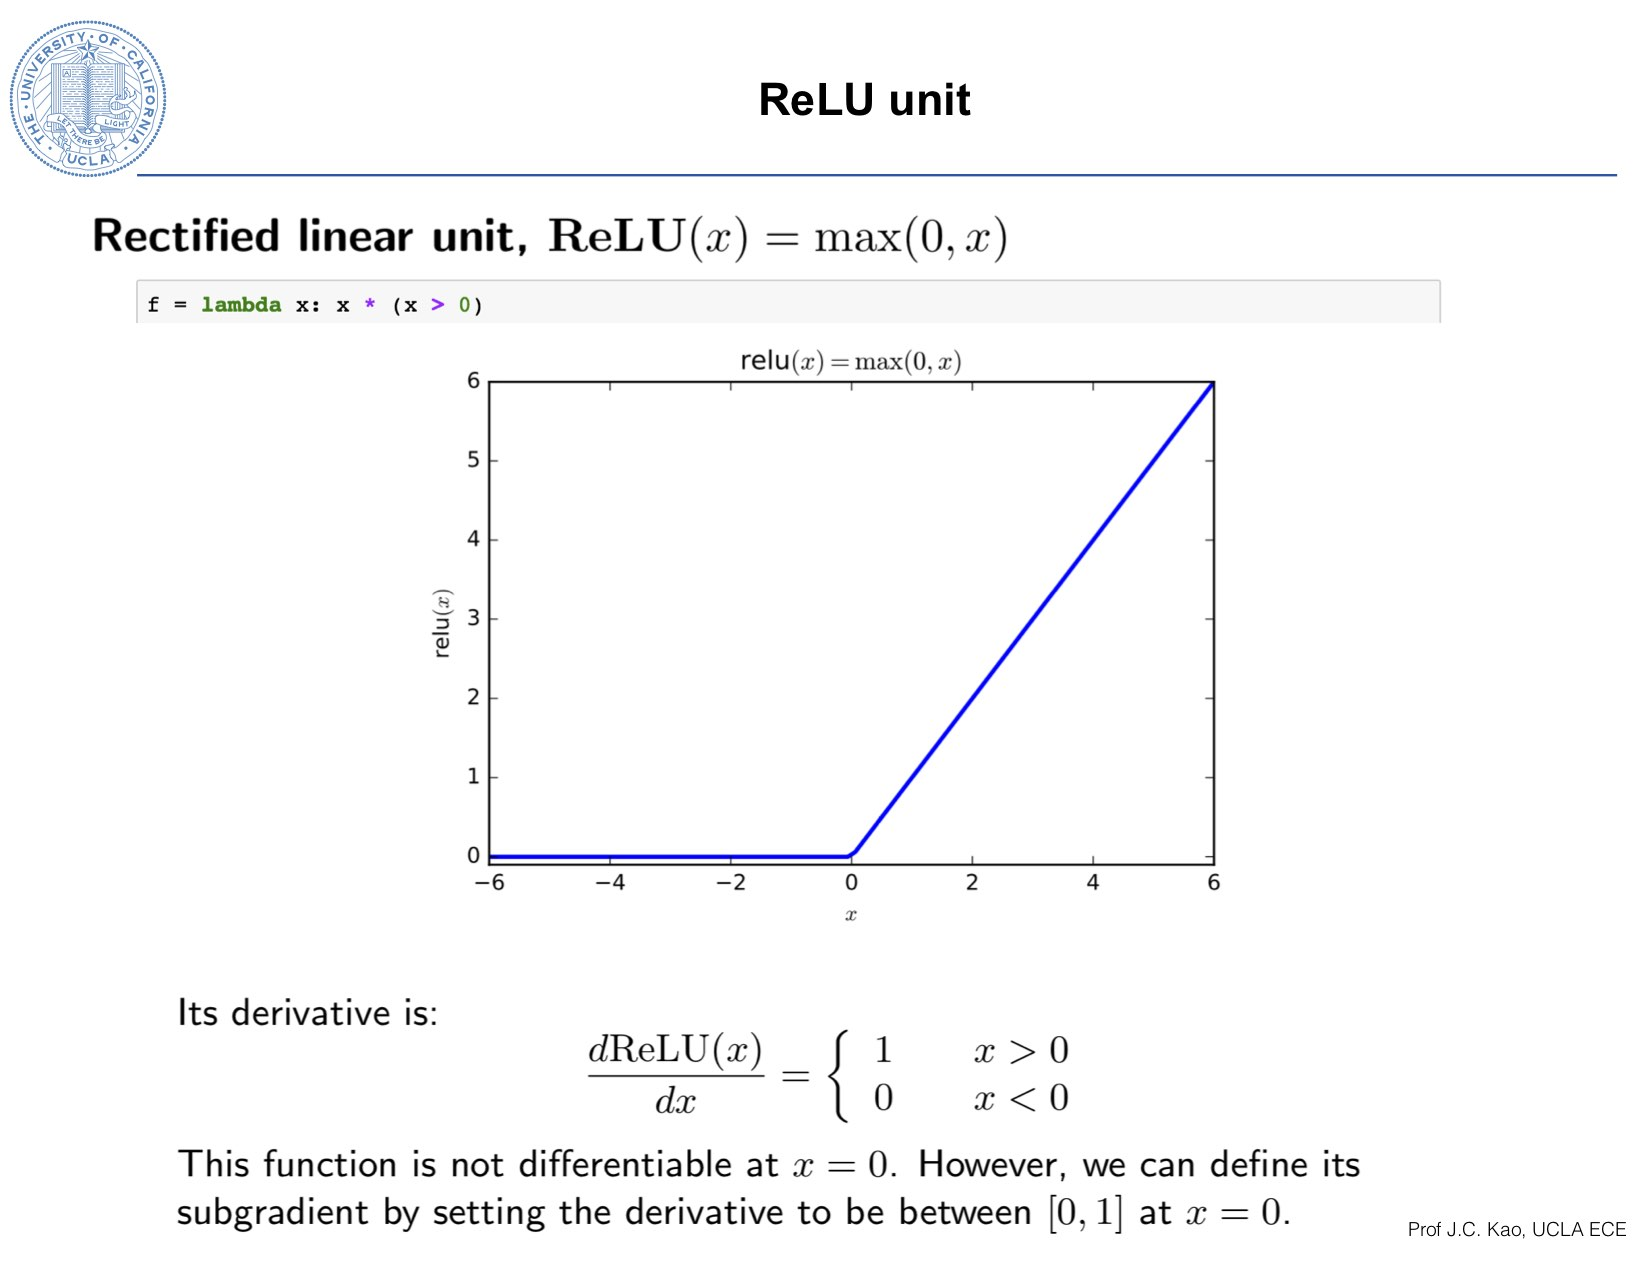

## Non-linearity in the output layer
A commonly used non-linear function in the output function for a binary classification is the sigmoid unit function.

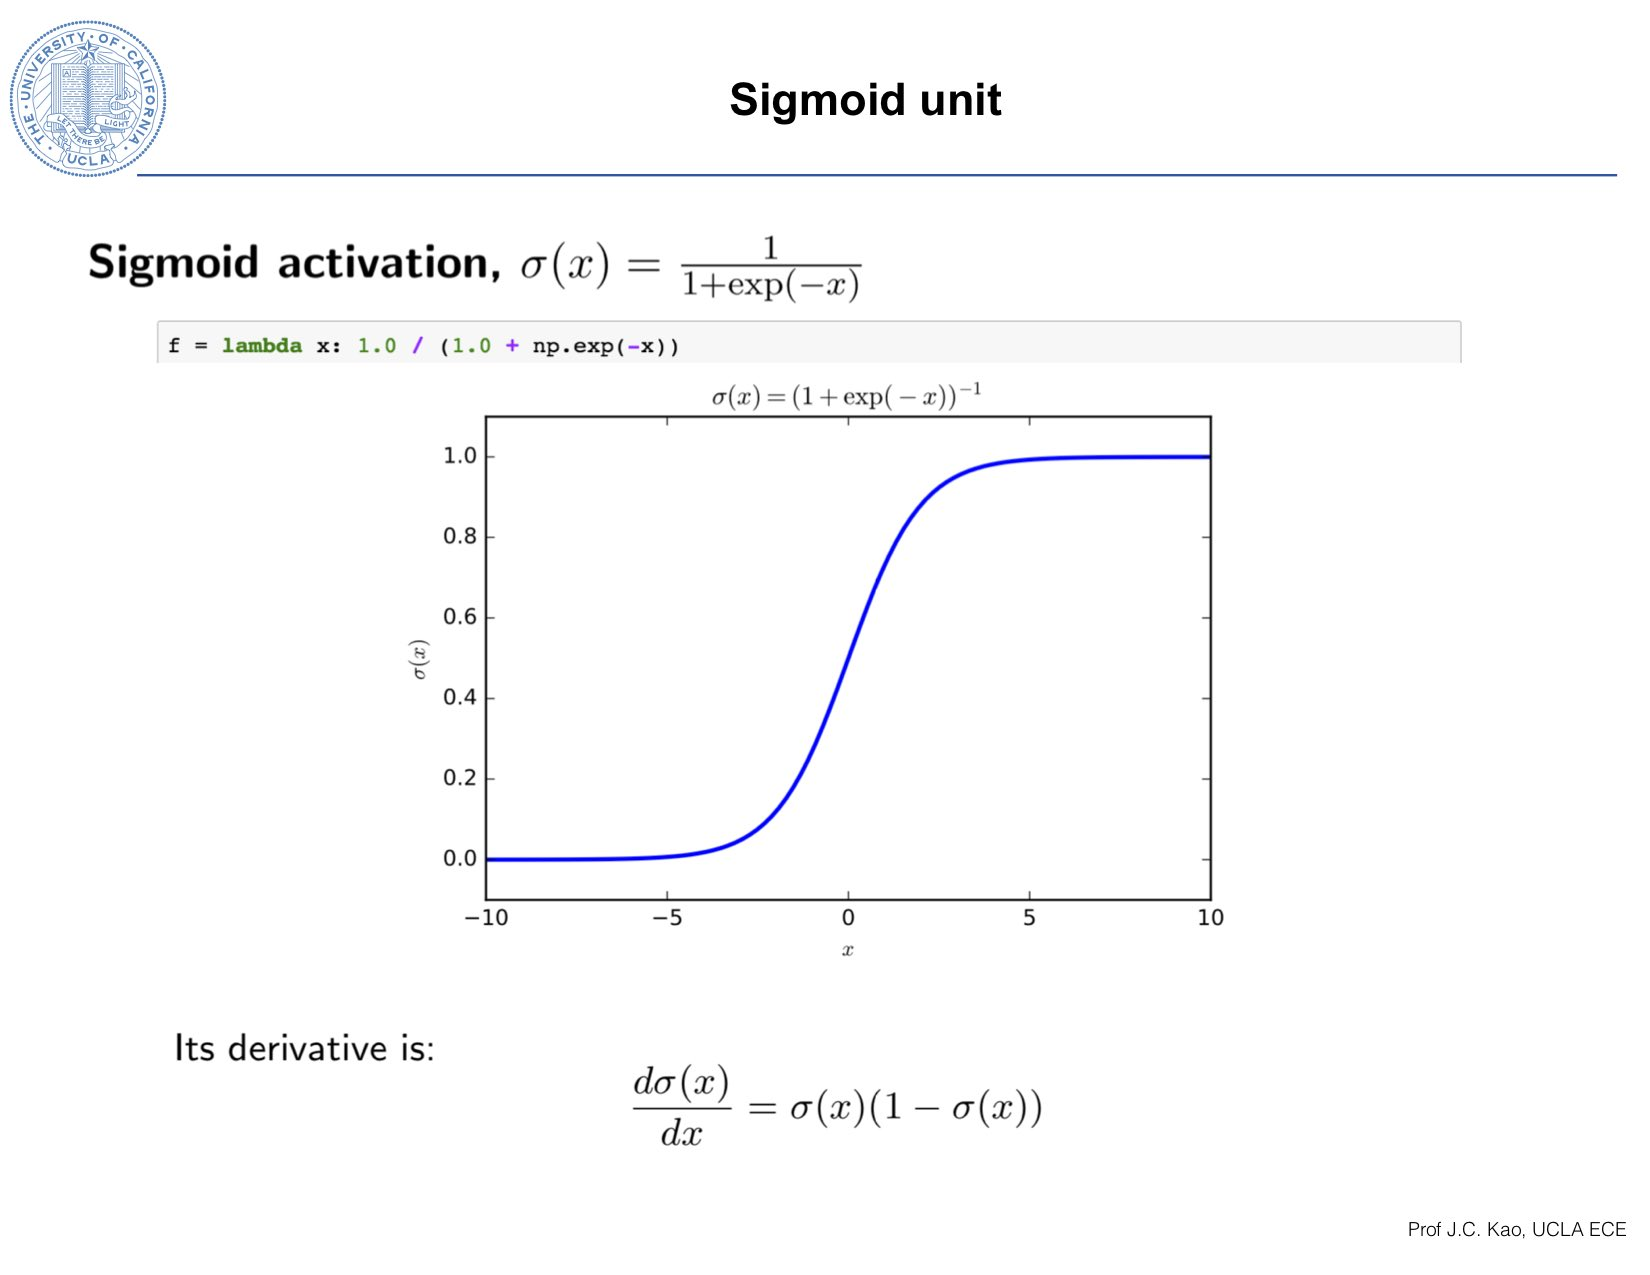

## Cost functions
Cost functions are a way of motivating the network to optimize. For example, we may want to minimize the difference between the output data and the target (ground truth), in which our cost function would be the minimization of (y - y_hat); where y is the output data from our network and y_hat is the ground truth. Commonly used cost functions are mean-squared error (MSE) for continuous data and categorical cross entropy for categorical data.

# Part 3: What are convolutional neural networks?
Convolutional neural network is a type of neural network that integrates convolutions into its network. Essentially, they are like filters, like we have experimented with in the previous sections. 

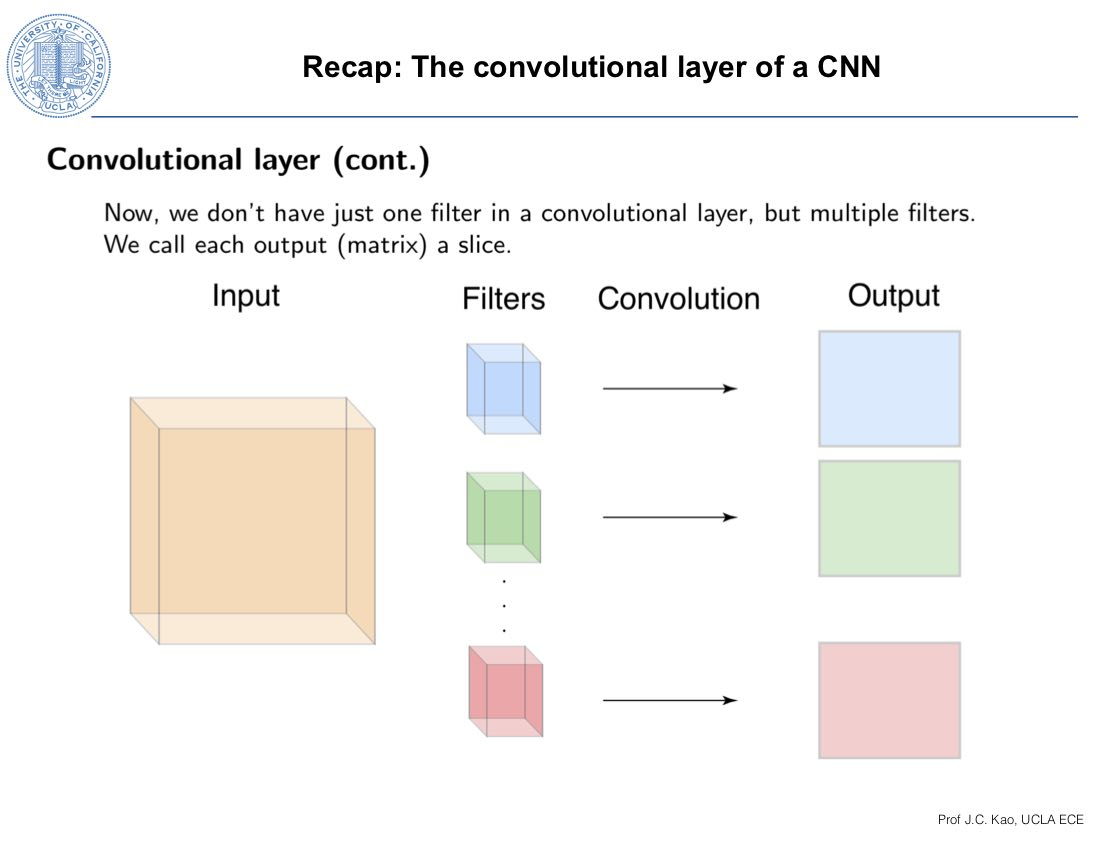

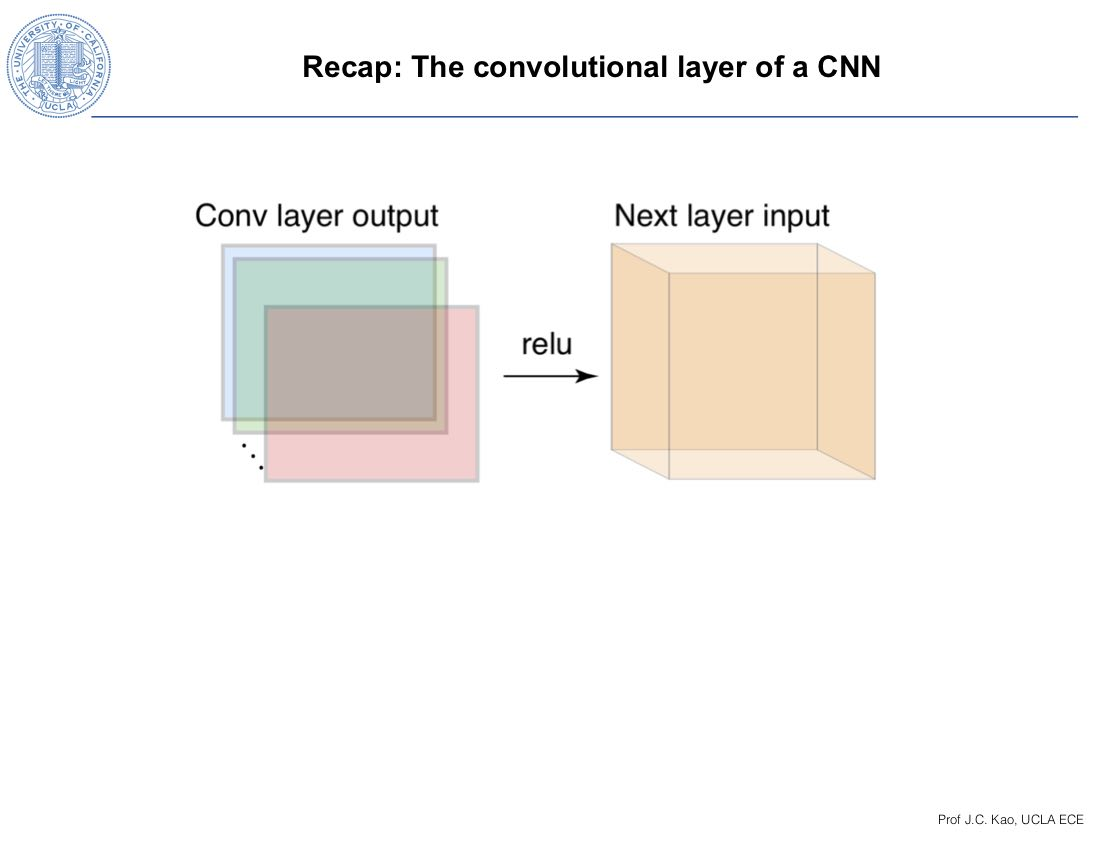

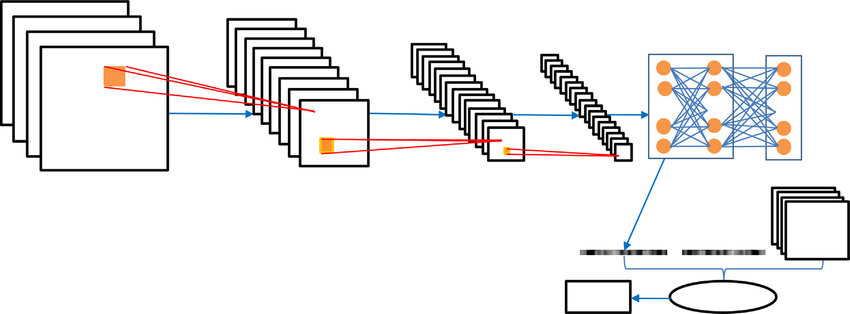

Image from https://www.researchgate.net/figure/Flow-chart-of-a-2D-CNN-based-benchmark-method_fig2_327535503

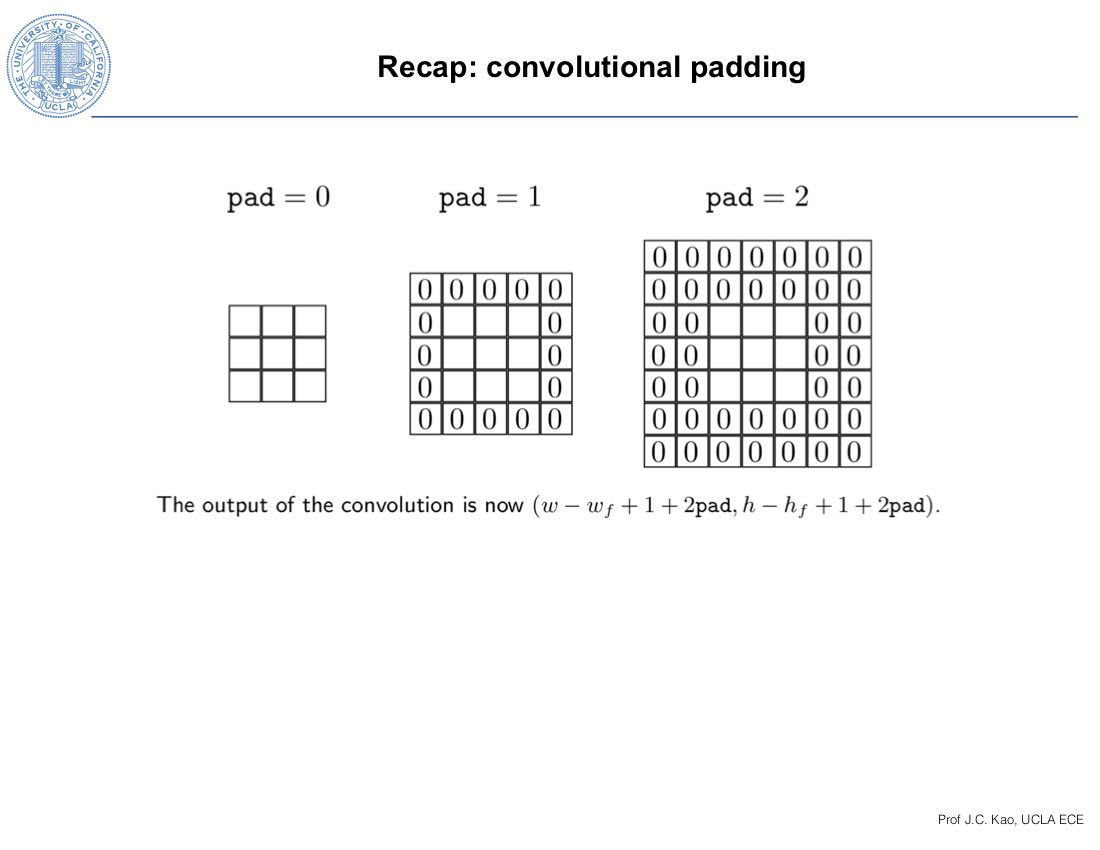

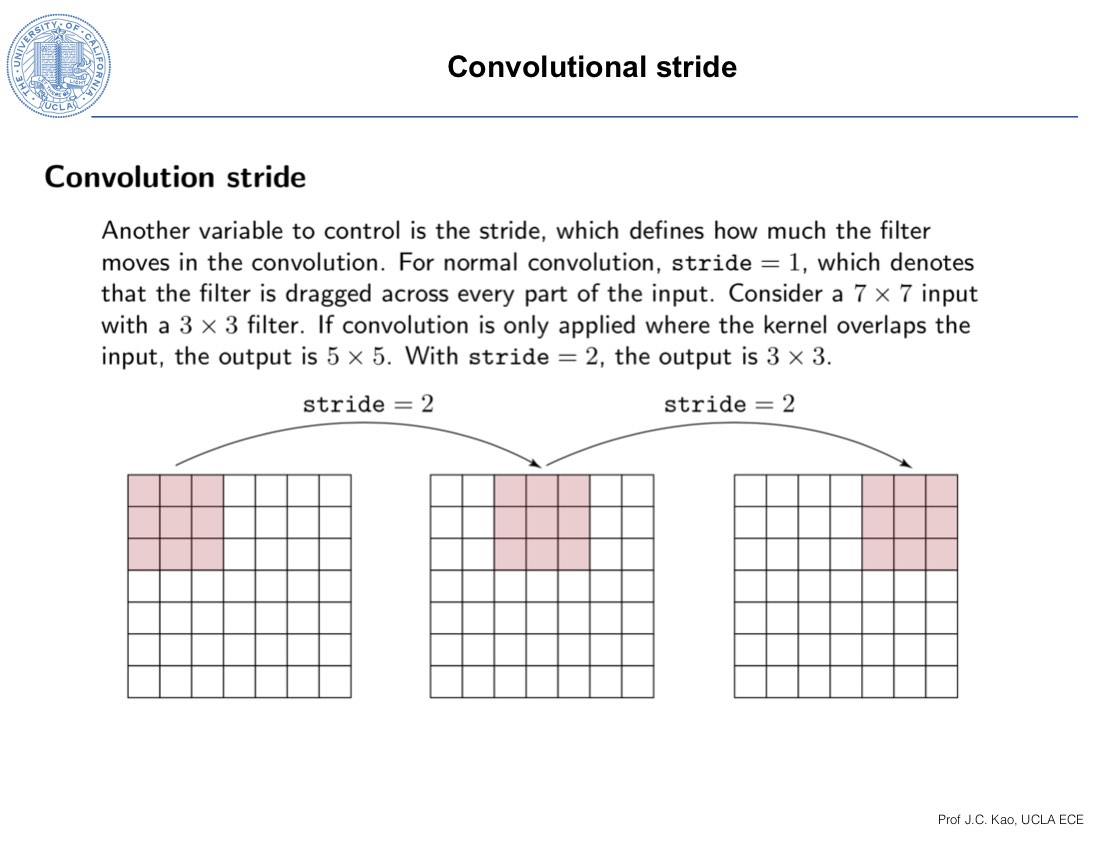

# Part 3: Other hyperparameters
**Learning rate** or the step size is how much you would like to step down your cost function. Generally, smaller step sizes will allow your network to not overshoot the optimal point but will have a slower learning time. On the flip side, a larger step size will allow a quicker learning time, except that you risk overshooting and may not come to the most optimal value in your parameters in your network.

**Epochs** are the number of iterations that you would like for your network to see the entire dataset.


# Part 4: Build a neural network for MNIST dataset

In [ ]:
## This section inspired by Amitrajit Bose from https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

import numpy as np
import torch # PyTorch is an API that has a library of functions and capabilities for deep learning
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## convert input data to torch tensors and normalize them
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(0.5, 0.5),
                              ])

## pull MNIST data to current working directory (try FashioMNIST if LeCun's server is still down)
Xtrain = datasets.MNIST('.', download=True, 
                        train=True, 
                        transform=transform)
Xval = datasets.MNIST('.', download=True, 
                      train=False, 
                      transform=transform)

## wrap it via DataLoader, which is optimized for quickly loading in data during training
trainloader = DataLoader(Xtrain, 
                         batch_size=64, 
                         shuffle=True)
valloader = DataLoader(Xval, 
                       batch_size=64, 
                       shuffle=True)



## View the images


In [ ]:
images, classes = iter(trainloader).next()
i=0 # change to view other images in the list
plt.imshow(images[i].numpy().squeeze(), cmap='gray')

## what are the dimensions of the images?
print(images.shape)

## what do these values mean?
print(classes[i])

In [ ]:
images, classes = iter(valloader).next()
print(images.shape)

## Template 2D neural network

In [ ]:
import torch.nn as nn

class model(nn.Module):
  def __init__(self):
    super(model, self).__init__()
    self.channels = 1
    self.num_filters = 5
    self.filter_width = 2
    self.stride = 1
    self.num_classes = 10

    self.inputLayer = nn.Sequential(nn.Conv2d(self.channels, 
                                              self.num_filters, 
                                              self.filter_width, 
                                              self.stride),
                                    nn.BatchNorm2d(self.num_filters),
                                    nn.ReLU())
    
    self.num_filters2 = 40
    self.filter_width2 = 3
    self.stride2 = 1

    self.hiddenLayer1 = nn.Sequential(nn.Conv2d(self.num_filters, 
                                              self.num_filters2, 
                                              self.filter_width2, 
                                              self.stride2),
                                      nn.BatchNorm2d(self.num_filters2),
                                      nn.ReLU()
                                    )
    
    self.num_filters3 = 80
    self.filter_width3 = 5
    self.stride3 = 1

    self.hiddenLayer2 = nn.Sequential(nn.Conv2d(self.num_filters2, 
                                              self.num_filters3, 
                                              self.filter_width3, 
                                              self.stride3),
                                      nn.BatchNorm2d(self.num_filters3),
                                      nn.ReLU()
                                    )
    
    self.num_hs = 100
    self.squeezed = 35280

    self.outputLayer = nn.Sequential(nn.Linear(self.squeezed, self.num_hs),
                                     nn.BatchNorm1d(self.num_hs),
                                     nn.ReLU(),
                                     nn.Linear(self.num_hs, self.num_classes),
                                     nn.Softmax(dim=1))
    
  def forward(self, X):
    ## build the layers
    outputFromInputLayer = self.inputLayer(X)
    outputFromHiddenLayer1 = self.hiddenLayer1(outputFromInputLayer)
    outputFromHiddenLayer2 = self.hiddenLayer2(outputFromHiddenLayer1)

    ## squeeze into 2 dimensional vector
    squeezed = outputFromHiddenLayer2.view(outputFromHiddenLayer2.size(0), -1)
    
    ## hacky way (sorry): turn off after finding out the size
    print(squeezed.size())

    ## input into output layer
    outputFromOutputLayer = self.outputLayer(squeezed)

    return outputFromOutputLayer


## Create a solver for the training

In [ ]:
import torch.optim as optim

class Solver(object):
  def __init__(self, trainloader, valloader):
    self.trainloader = trainloader
    self.valloader = valloader
    self.learning_rate = 1e-5
    self.num_epochs = 10
    self.model = model()
    self.optimizer = optim.Adam(self.model.parameters(), lr = self.learning_rate, betas=(0.5, 0.999))

    self.CE_Loss = nn.CrossEntropyLoss()

  def train(self):
    self.model.train()
    print('Starting training..')

    for e in range(self.num_epochs):
      train_loss, train_correct, train_total = (0,0,0)
      val_loss, val_correct, val_total = (0,0,0)

      print('Epoch {0}/{1}'.format(int(e+1), int(self.num_epochs)))

      for idx, (images, true_classes) in enumerate(self.trainloader):
        output = self.model(images)
        loss = self.CE_Loss(output, true_classes)

        self.optimizer.zero_grad()
        loss.backward()

        train_loss += loss.item()
        train_total += output.size(0)
        _, output_classes = torch.max(output.data,1)
        train_correct += torch.sum(output_classes.eq(true_classes.data))
        train_correct = train_correct.item()
        self.optimizer.step()

        if idx !=0 and idx % 50 == 0:
          print('Train Loss: %.4f | Train Accuracy: %.4f '% (train_loss/(idx+1),
                                                     (train_correct/train_total)*100))
          
      ## validation
      self.model.eval()
      with torch.no_grad():
        for idx, (images, true_classes) in enumerate(self.valloader):
          output = self.model(images)
          loss = self.CE_Loss(output, true_classes)

          val_loss += loss.item()
          val_total += output.size(0)
          _, output_classes = torch.max(output.data,1)
          val_correct += torch.sum(output_classes.eq(true_classes.data))
          val_correct = val_correct.item()

          if idx !=0 and idx % 20 == 0:
            print('Validation Loss: %.4f | Validation Accuracy: %.4f '% (val_loss/(idx+1),
                                                      (val_correct/val_total)*100))
      self.model.train()


# Functional script to run the model

In [ ]:
solver = Solver(trainloader, valloader)
solver.train()

## save model
torch.save(solver.model.state_dict(), './my_model_mnist.pt')

# Task 3: Modify the model above to achieve your best accuracy in the validation dataset

# Part 5: Try with the CIFAR-10 dataset
The CIFAR-10 dataset consists of natural images from 10 classes. Note that there are 3 channels in the images, so please modify the input layer to take in 3 channels (self.channels = 3).



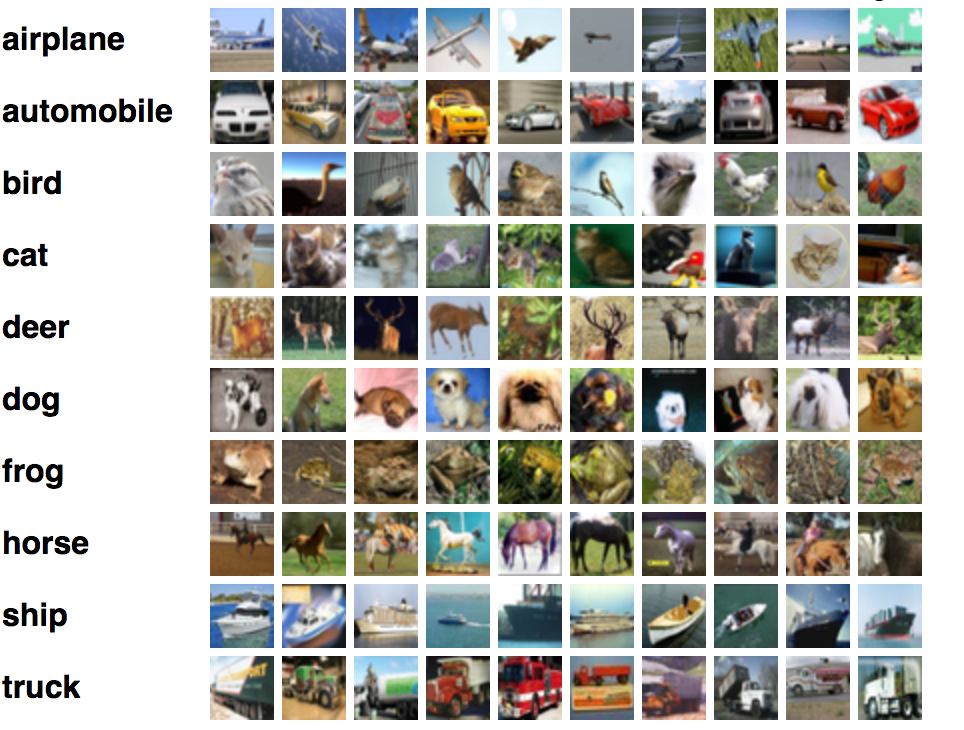

Photo from https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

## Pull CIFAR-10 dataset and transform

In [ ]:
## pull CIFAR-10 data to current working directory
Xtrain = datasets.CIFAR10('.', download=True, train=True, transform=transform)
Xval = datasets.CIFAR10('.', download=True, train=False, transform=transform)

## wrap it via DataLoader, which is optimized for quickly loading in data during training
trainloader = DataLoader(Xtrain, batch_size=50, shuffle=True)
valloader = DataLoader(Xval, batch_size=50, shuffle=True)

## Task 4: Modify the code below to achieve your best accuracy in the validation dataset!

In [ ]:
import torch.nn as nn

class model(nn.Module):
  def __init__(self):
    super(model, self).__init__()
    self.channels = 3
    self.num_filters = 5
    self.filter_width = 2
    self.stride = 1
    self.num_classes = 10

    self.inputLayer = nn.Sequential(nn.Conv2d(self.channels, 
                                              self.num_filters, 
                                              self.filter_width, 
                                              self.stride),
                                    nn.BatchNorm2d(self.num_filters),
                                    nn.ReLU())
    
    self.num_filters2 = 40
    self.filter_width2 = 3
    self.stride2 = 1

    self.hiddenLayer1 = nn.Sequential(nn.Conv2d(self.num_filters, 
                                              self.num_filters2, 
                                              self.filter_width2, 
                                              self.stride2),
                                      nn.BatchNorm2d(self.num_filters2),
                                      nn.ReLU()
                                    )
    
    self.num_filters3 = 80
    self.filter_width3 = 5
    self.stride3 = 1

    self.hiddenLayer2 = nn.Sequential(nn.Conv2d(self.num_filters2, 
                                              self.num_filters3, 
                                              self.filter_width3, 
                                              self.stride3),
                                      nn.BatchNorm2d(self.num_filters3),
                                      nn.ReLU()
                                    )
    
    self.num_hs = 100
    self.squeezed = 50000

    self.outputLayer = nn.Sequential(nn.Linear(self.squeezed, self.num_hs),
                                     nn.BatchNorm1d(self.num_hs),
                                     nn.ReLU(),
                                     nn.Linear(self.num_hs, self.num_classes),
                                     nn.Softmax(dim=1))
    
  def forward(self, X):
    ## build the layers
    outputFromInputLayer = self.inputLayer(X)
    outputFromHiddenLayer1 = self.hiddenLayer1(outputFromInputLayer)
    outputFromHiddenLayer2 = self.hiddenLayer2(outputFromHiddenLayer1)

    ## squeeze into 2 dimensional vector
    squeezed = outputFromHiddenLayer2.view(outputFromHiddenLayer2.size(0), -1)
    
    ## hacky way again -- so sorry
    print(squeezed.size())

    ## input into output layer
    outputFromOutputLayer = self.outputLayer(squeezed)

    return outputFromOutputLayer


In [ ]:
import torch.optim as optim

class Solver(object):
  def __init__(self, trainloader, valloader):
    self.trainloader = trainloader
    self.valloader = valloader
    self.learning_rate = 1e-5
    self.num_epochs = 10
    self.model = model()
    self.optimizer = optim.Adam(self.model.parameters(), lr = self.learning_rate, betas=(0.5, 0.999))

    self.CE_Loss = nn.CrossEntropyLoss()

  def train(self):
    self.model.train()
    print('Starting training..')

    for e in range(self.num_epochs):
      train_loss, train_correct, train_total = (0,0,0)
      val_loss, val_correct, val_total = (0,0,0)

      print('Epoch {0}/{1}'.format(int(e+1), int(self.num_epochs)))

      for idx, (images, true_classes) in enumerate(self.trainloader):
        output = self.model(images)
        loss = self.CE_Loss(output, true_classes)

        self.optimizer.zero_grad()
        loss.backward()

        train_loss += loss.item()
        train_total += output.size(0)
        _, output_classes = torch.max(output.data,1)
        train_correct += torch.sum(output_classes.eq(true_classes.data))
        train_correct = train_correct.item()
        self.optimizer.step()

        if idx !=0 and idx % 50 == 0:
          print('Train Loss: %.4f | Train Accuracy: %.4f '% (train_loss/(idx+1),
                                                     (train_correct/train_total)*100))
          
      ## validation
      self.model.eval()
      with torch.no_grad():
        for idx, (images, true_classes) in enumerate(self.valloader):
          output = self.model(images)
          loss = self.CE_Loss(output, true_classes)

          val_loss += loss.item()
          val_total += output.size(0)
          _, output_classes = torch.max(output.data,1)
          val_correct += torch.sum(output_classes.eq(true_classes.data))
          val_correct = val_correct.item()

          if idx !=0 and idx % 20 == 0:
            print('Validation Loss: %.4f | Validation Accuracy: %.4f '% (val_loss/(idx+1),
                                                      (val_correct/val_total)*100))
      self.model.train()


In [ ]:
solver = Solver(trainloader, valloader)
solver.train()

## save model
torch.save(solver.model.state_dict(), './my_model_cifar10.pt')

In [ ]:
## Optional: GPU version (go to Edit -> Notebook Setting -> Select GPU)
import torch.optim as optim

class Solver(object):
  def __init__(self, trainloader, valloader):
    self.trainloader = trainloader
    self.valloader = valloader
    self.learning_rate = 1e-5
    self.num_epochs = 10
    self.model = model().cuda()
    self.optimizer = optim.Adam(self.model.parameters(), lr = self.learning_rate, betas=(0.5, 0.999))

    self.CE_Loss = nn.CrossEntropyLoss().cuda()

  def train(self):
    self.model.train()
    print('Starting training..')

    for e in range(self.num_epochs):
      train_loss, train_correct, train_total = (0,0,0)
      val_loss, val_correct, val_total = (0,0,0)

      print('Epoch {0}/{1}'.format(int(e+1), int(self.num_epochs)))

      for idx, (images, true_classes) in enumerate(self.trainloader):
        output = self.model(images.cuda())
        loss = self.CE_Loss(output, true_classes.cuda())

        self.optimizer.zero_grad()
        loss.backward()

        train_loss += loss.item()
        train_total += output.size(0)
        _, output_classes = torch.max(output.data,1)
        train_correct += torch.sum(output_classes.cpu().eq(true_classes.data))
        train_correct = train_correct.item()
        self.optimizer.step()

        if idx !=0 and idx % 50 == 0:
          print('Train Loss: %.4f | Train Accuracy: %.4f '% (train_loss/(idx+1),
                                                     (train_correct/train_total)*100))
          
      ## validation
      self.model.eval()
      with torch.no_grad():
        for idx, (images, true_classes) in enumerate(self.valloader):
          output = self.model(images.cuda())
          loss = self.CE_Loss(output, true_classes.cuda())

          val_loss += loss.item()
          val_total += output.size(0)
          _, output_classes = torch.max(output.data,1)
          val_correct += torch.sum(output_classes.cpu().eq(true_classes.data).cpu())
          val_correct = val_correct.item()

          if idx !=0 and idx % 20 == 0:
            print('Validation Loss: %.4f | Validation Accuracy: %.4f '% (val_loss/(idx+1),
                                                      (val_correct/val_total)*100))
      self.model.train()
